In [1]:
import numpy as np
import pymc3 as pm
import matplotlib.pyplot as plt





WARNING (theano.tensor.blas): Using NumPy C-API based implementation for BLAS functions.


,height,weight,age,male
0,151.765,47.825606,63.0,1
1,139.700,36.485807,63.0,0
2,136.525,31.864838,65.0,0
3,156.845,53.041914,41.0,1
4,145.415,41.276872,51.0,0


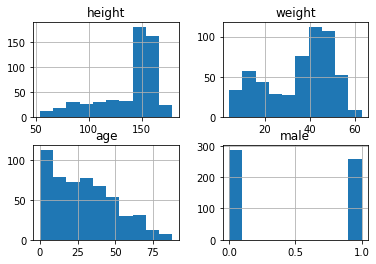

In [2]:
import pandas as pd
d = pd.read_csv('data/Howell1.csv', sep=';', header=0)
d.hist()

d.head()



All we want for now are heights of adults in the sample. The reason to filter out nonadults
for now is that height is strongly correlated with age, before adulthood

array([[<AxesSubplot:title={'center':'height'}>,
        <AxesSubplot:title={'center':'weight'}>],
       [<AxesSubplot:title={'center':'age'}>,
        <AxesSubplot:title={'center':'male'}>]], dtype=object)

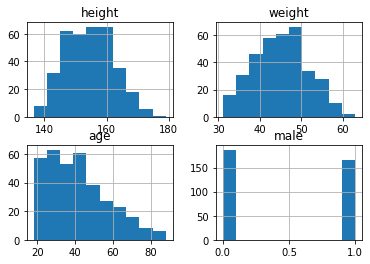

In [3]:
d2 = d[d.age >= 18]
d2.hist()

<p>Adult heights from a single population are nearly always approximately normal. ( bimodel if you take gender in account).So it’s reasonable for the moment to adopt the stance that the model should use a Gauss- ian distribution for the probability distribution of the data. </p>
<p>So which Gaussian distribution? There are an infinite number of them, with an infinite number of different means and standard deviations. We’re ready to write down the general model and compute the plausibility of each combination of μ and σ. To define the heights as normally distributed with a mean μ and standard deviation σ, we write:</p>

$$ h_i ∼ Normal(μ, σ)$$

What are the priors

$$μ ∼ Normal(165,40)$$

$$ σ ∼ Uniform(0, 50)$$

In [32]:
with pm.Model() as normalheightmodel:
    mu = pm.Normal('mu', mu=165, sd=40)#prior for mu
    sigma = pm.Uniform('sigma', lower=0, upper=50)#prior for sigma
    height = pm.Normal('height', mu=mu, sd=sigma, observed=d2.height)#likelyhood
    prior_checks = pm.sample_prior_predictive(samples=50)

In [8]:
prior_checks

{'sigma': array([36.03190582, 49.57431578, 46.54069108, 49.08032134, 24.25472073,
        37.219932  , 40.85480476, 49.32611508,  5.7751237 , 36.62952848,
        22.3276216 ,  6.99354734, 22.54640137, 28.72374607, 22.53433871,
         1.94304222, 15.0386039 , 15.04032588, 31.14827648,  0.75379003,
         7.43404334, 39.84109751,  9.57885204, 16.72147097, 43.72499175,
        17.00507426, 45.76692903, 24.19637732, 21.48756276, 23.77874791,
        34.04474309, 47.70909402, 19.91005673, 32.19953217, 23.50893974,
        35.70785168, 46.74235642, 32.81466389, 14.53571459, 49.67911513,
        30.05590402, 19.88426146, 44.43905383, 25.99396486, 23.2548681 ,
         6.73076234,  1.19194574, 19.2473829 , 39.06565814,  8.96972663]),
 'height': array([[315.01770856, 216.04663666, 251.30401717, ..., 219.48435548,
         192.98943352, 186.23372788],
        [173.56737877, 114.97341   , 125.99485037, ..., 124.7988156 ,
         162.41895914, 246.79668163],
        [105.70989887, 100.897167

In [6]:
priorDF=pd.DataFrame()
for key, value in prior_checks.items():
   if (key !='height'):
        priorDF[key]=value
priorDF.head()   

,sigma,mu,sigma_interval__
0,46.753775,253.940285,2.667402
1,0.814069,199.659193,-4.101318
2,35.079677,148.745873,0.854898
3,29.032765,188.376504,0.325464
4,8.320925,176.339019,-1.611226


array([[<AxesSubplot:title={'center':'sigma'}>,
        <AxesSubplot:title={'center':'mu'}>],
       [<AxesSubplot:title={'center':'sigma_interval__'}>,
        <AxesSubplot:>]], dtype=object)

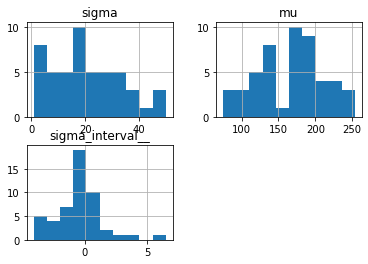

In [7]:
priorDF.hist()

<AxesSubplot:>

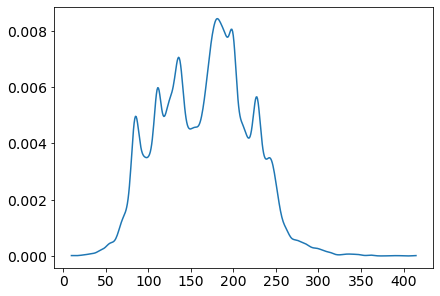

In [8]:
import arviz as az
az.plot_kde((prior_checks['height']))

SAME THING WITH ARVIZ

In [33]:

names = d2.index.values
N = len(names)


dims={
    "height": ["developer"],
    "weight": ["developer"],
    "age": ["developer"],
}
with pm.Model() as model:
    
    
    mu = pm.Normal('mu', mu=167, sd=20)
    sigma = pm.Uniform('sigma', lower=0, upper=50)
    height = pm.Normal('height', mu=mu, sd=sigma, observed=d2.height)
    
    # BUİLDS PRIOR PREDICTİVE DIST
    
    trace = pm.sample(400, chains=4)# CREATES SAMPLES FROM POSTERIOR DISTRIBUTION
    posterior_predictive = pm.sample_posterior_predictive(trace)# CREATES POSTERIOR PREDICTIVE
                                                                  #CHECKS
    prior = pm.sample_prior_predictive(150) # BUİLDS PRIOR PREDICTİVE DIST
   
    idata_pymc3 = az.from_pymc3(    # FOR ARVIZ USAGE
        trace,
        prior=prior,
        posterior_predictive=posterior_predictive,
        coords={"developer": names},
        dims=dims
    )

C:\Users\gsahinpi\AppData\Local\Temp/ipykernel_25240/829224862.py:19: FutureWarning: In v4.0, pm.sample will return an `arviz.InferenceData` object instead of a `MultiTrace` by default. You can pass return_inferencedata=True or return_inferencedata=False to be safe and silence this warning.
  trace = pm.sample(400, chains=4)# CREATES SAMPLES FROM POSTERIOR DISTRIBUTION
Only 400 samples in chain.
Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (4 chains in 4 jobs)
NUTS: [sigma, mu]


Sampling 4 chains for 1_000 tune and 400 draw iterations (4_000 + 1_600 draws total) took 22 seconds.


0, dim: developer, 352 =? 352


<AxesSubplot:xlabel='height'>

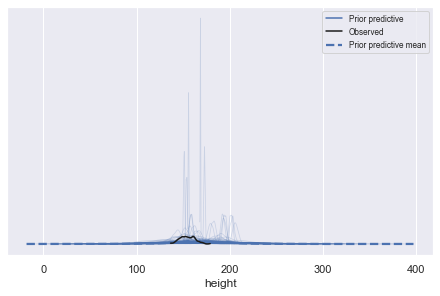

In [34]:
   az.plot_ppc(idata_pymc3 ,group='prior') # plot prior predictive dist

C:\ProgramData\Anaconda3\envs\stat-rethink2-pymc3\lib\site-packages\arviz\data\io_pymc3.py:96: FutureWarning: Using `from_pymc3` without the model will be deprecated in a future release. Not using the model will return less accurate and less useful results. Make sure you use the model argument or call from_pymc3 within a model context.
  warnings.warn(


array([[<AxesSubplot:title={'center':'mu'}>,
        <AxesSubplot:title={'center':'mu'}>],
       [<AxesSubplot:title={'center':'sigma'}>,
        <AxesSubplot:title={'center':'sigma'}>]], dtype=object)

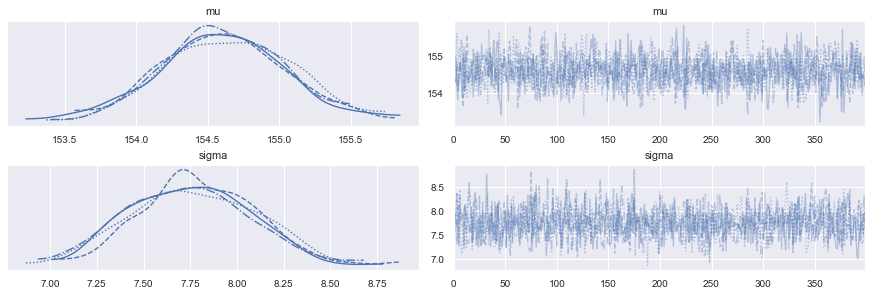

In [35]:
az.plot_trace(trace) 

C:\ProgramData\Anaconda3\envs\stat-rethink2-pymc3\lib\site-packages\arviz\data\io_pymc3.py:96: FutureWarning: Using `from_pymc3` without the model will be deprecated in a future release. Not using the model will return less accurate and less useful results. Make sure you use the model argument or call from_pymc3 within a model context.
  warnings.warn(


array([<AxesSubplot:title={'center':'mu'}>,
       <AxesSubplot:title={'center':'sigma'}>], dtype=object)

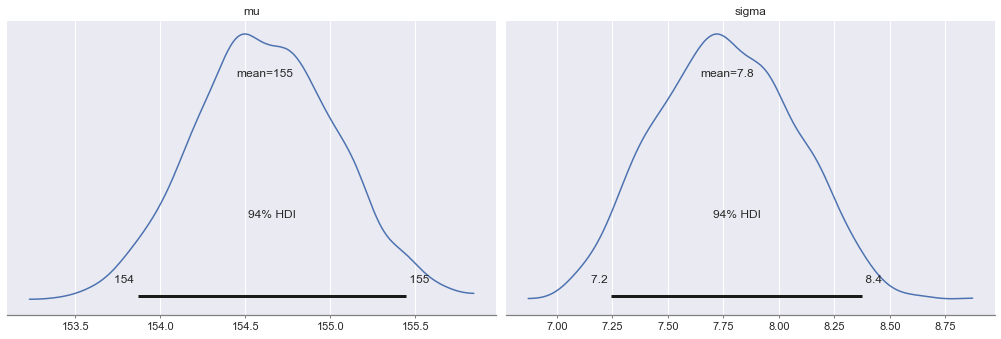

In [36]:
az.plot_posterior(trace) # plot posterior distributıon after seing data

<AxesSubplot:xlabel='height'>

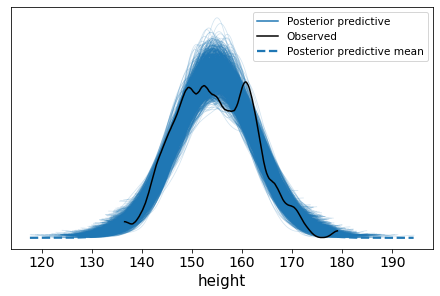

In [21]:
 az.plot_ppc(idata_pymc3 ,group='posterior')#posterior predictive dist

## Another Example Placebo:
a fictitious example from Kruschke (2012) concerning the evaluation of a clinical trial for drug evaluation. The trial aims to evaluate the efficacy of a “smart drug” that is supposed to increase intelligence by comparing IQ scores of individuals in a treatment arm (those receiving the drug) to those in a control arm (those recieving a placebo). There are 47 individuals and 42 individuals in the treatment and control arms, respectively.


In [2]:
%matplotlib inline
import numpy as np
import pymc3 as pm
import pandas as pd
import seaborn as sns
sns.set(color_codes=True)

np.random.seed(20090425)

WARNING (theano.tensor.blas): Using NumPy C-API based implementation for BLAS functions.


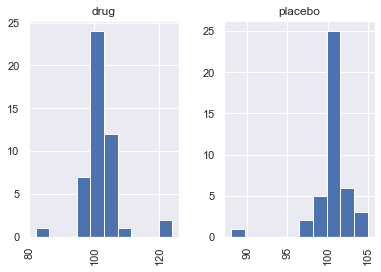

In [3]:
drug = (101,100,102,104,102,97,105,105,98,101,100,123,105,103,100,95,102,106,
        109,102,82,102,100,102,102,101,102,102,103,103,97,97,103,101,97,104,
        96,103,124,101,101,100,101,101,104,100,101)
placebo = (99,101,100,101,102,100,97,101,104,101,102,102,100,105,88,101,100,
           104,100,100,100,101,102,103,97,101,101,100,101,99,101,100,100,
           101,100,99,101,100,102,99,100,99)

y1 = np.array(drug)
y2 = np.array(placebo)
y = pd.DataFrame(dict(value=np.r_[y1, y2], group=np.r_[['drug']*len(drug), ['placebo']*len(placebo)]))

y.hist('value', by='group');

The first step in a Bayesian approach to inference is to specify the full probability model that corresponds to the problem. For this example, Kruschke chooses a Student-t distribution to describe the distributions of the scores in each group. This choice adds robustness to the analysis, as a T distribution is less sensitive to outlier observations, relative to a normal distribution. The three-parameter Student-t distribution allows for the specification of a mean μ, a precision (inverse-variance) λ and a degrees-of-freedom parameter ν:

f(x|μ,λ,ν)=Γ(ν+12)Γ(ν2)(λπν)12[1+λ(x−μ)2ν]−ν+12
the degrees-of-freedom parameter essentially specifies the “normality” of the data, since larger values of ν make the distribution converge to a normal distribution, while small values (close to zero) result in heavier tails.

Thus, the likelihood functions of our model are specified as follows:

yi(treat)∼T(ν,μ1,σ1)
yi(placebo)∼T(ν,μ2,σ2)
As a simplifying assumption, we will assume that the degree of normality ν is the same for both groups. We will, of course, have separate parameters for the means μk,k=1,2 and standard deviations σk.

Since the means are real-valued, we will apply normal priors on them, and arbitrarily set the hyperparameters to the pooled empirical mean of the data and twice the pooled empirical standard deviation, which applies very diffuse information to these quantities (and importantly, does not favor one or the other a priori).

μk∼N(x¯,2s)
y(treat)i∼T(ν,μ1,σ1)
 
y(placebo)i∼T(ν,μ2,σ2)



In [5]:
y.head(50)

,value,group
0,101,drug
1,100,drug
2,102,drug
3,104,drug
4,102,drug
5,97,drug
6,105,drug
7,105,drug
8,98,drug
9,101,drug


In [6]:
μ_m = y.value.mean()
μ_s = y.value.std() * 2

with pm.Model() as model:
    group1_mean = pm.Normal('group1_mean', μ_m, sd=μ_s)
    group2_mean = pm.Normal('group2_mean', μ_m, sd=μ_s)
    

In [7]:
σ_low = 1
σ_high = 10

with model:
    group1_std = pm.Uniform('group1_std', lower=σ_low, upper=σ_high)
    group2_std = pm.Uniform('group2_std', lower=σ_low, upper=σ_high)

c:\ProgramData\Anaconda3\envs\stat-rethink2-pymc3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


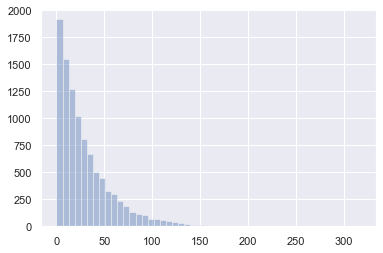

In [8]:
with model:
    ν = pm.Exponential('ν_minus_one', 1/29.) + 1

sns.distplot(np.random.exponential(30, size=10000), kde=False);


In [9]:
import arviz as az
with model:
    λ1 = group1_std**-2
    λ2 = group2_std**-2

    group1 = pm.StudentT('drugset', nu=ν, mu=group1_mean, lam=λ1, observed=y1)
    group2 = pm.StudentT('placeboset', nu=ν, mu=group2_mean, lam=λ2, observed=y2)

In [11]:
with model:
    trace = pm.sample(400, chains=4)# CREATES SAMPLES FROM POSTERIOR DISTRIBUTION
    posterior_predictive = pm.sample_posterior_predictive(trace)# CREATES POSTERIOR PREDICTIVE
                                                                  #CHECKS
    prior = pm.sample_prior_predictive(150) # BUİLDS PRIOR PREDICTİVE DIST
    idata_pymc3 = az.from_pymc3(    # FOR ARVIZ USAGE
        trace,
        prior=prior,
        posterior_predictive=posterior_predictive,
        coords={"developer": names},
        dims=dims
    )
   

C:\Users\gsahinpi\AppData\Local\Temp/ipykernel_11276/2348709245.py:2: FutureWarning: In v4.0, pm.sample will return an `arviz.InferenceData` object instead of a `MultiTrace` by default. You can pass return_inferencedata=True or return_inferencedata=False to be safe and silence this warning.
  trace = pm.sample(400, chains=4)# CREATES SAMPLES FROM POSTERIOR DISTRIBUTION
Only 400 samples in chain.
Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (4 chains in 4 jobs)
NUTS: [ν_minus_one, group2_std, group1_std, group2_mean, group1_mean]


Sampling 4 chains for 1_000 tune and 400 draw iterations (4_000 + 1_600 draws total) took 38 seconds.


NameError: name 'names' is not defined

array([<AxesSubplot:xlabel='drugset'>, <AxesSubplot:xlabel='placeboset'>],
      dtype=object)

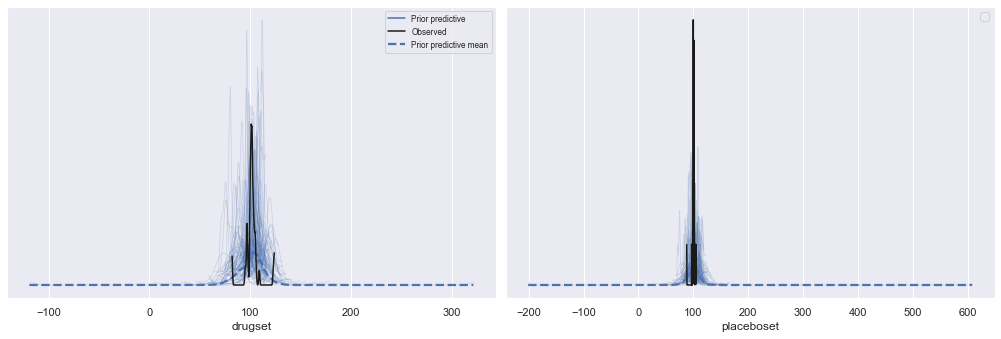

In [25]:
az.plot_ppc(idata_pymc3 ,group='prior')

C:\ProgramData\Anaconda3\envs\stat-rethink2-pymc3\lib\site-packages\arviz\data\io_pymc3.py:96: FutureWarning: Using `from_pymc3` without the model will be deprecated in a future release. Not using the model will return less accurate and less useful results. Make sure you use the model argument or call from_pymc3 within a model context.
  warnings.warn(


array([[<AxesSubplot:title={'center':'group1_mean'}>,
        <AxesSubplot:title={'center':'group2_mean'}>,
        <AxesSubplot:title={'center':'group1_std'}>],
       [<AxesSubplot:title={'center':'group2_std'}>,
        <AxesSubplot:title={'center':'ν_minus_one'}>, <AxesSubplot:>]],
      dtype=object)

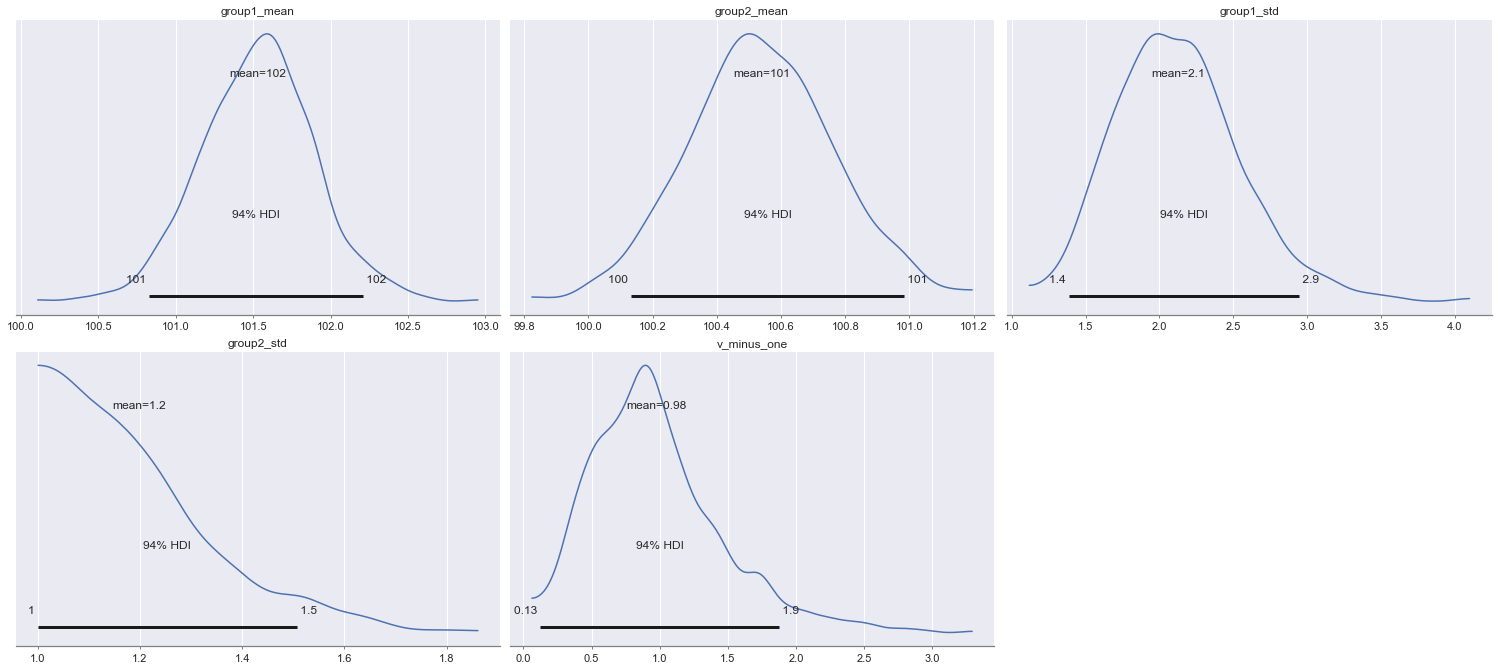

In [26]:
az.plot_posterior(trace)

In [12]:
with model:
    diff_of_means = pm.Deterministic('differenofmeans3', group1_mean - group2_mean)
    diff_of_stds = pm.Deterministic('differenceofstds3', group1_std - group2_std)
    effect_size = pm.Deterministic('effectsize3',
                                   diff_of_means / np.sqrt((group1_std**2 + group2_std**2) / 2))
    diftrace = pm.sample(2000,chains=2)
     

C:\Users\gsahinpi\AppData\Local\Temp/ipykernel_11276/2490401343.py:6: FutureWarning: In v4.0, pm.sample will return an `arviz.InferenceData` object instead of a `MultiTrace` by default. You can pass return_inferencedata=True or return_inferencedata=False to be safe and silence this warning.
  diftrace = pm.sample(2000,chains=2)
Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (2 chains in 4 jobs)
NUTS: [ν_minus_one, group2_std, group1_std, group2_mean, group1_mean]


Sampling 2 chains for 1_000 tune and 2_000 draw iterations (2_000 + 4_000 draws total) took 18 seconds.


C:\ProgramData\Anaconda3\envs\stat-rethink2-pymc3\lib\site-packages\arviz\data\io_pymc3.py:96: FutureWarning: Using `from_pymc3` without the model will be deprecated in a future release. Not using the model will return less accurate and less useful results. Make sure you use the model argument or call from_pymc3 within a model context.
  warnings.warn(


array([[<AxesSubplot:title={'center':'group1_mean'}>,
        <AxesSubplot:title={'center':'group1_mean'}>],
       [<AxesSubplot:title={'center':'group2_mean'}>,
        <AxesSubplot:title={'center':'group2_mean'}>],
       [<AxesSubplot:title={'center':'group1_std'}>,
        <AxesSubplot:title={'center':'group1_std'}>],
       [<AxesSubplot:title={'center':'group2_std'}>,
        <AxesSubplot:title={'center':'group2_std'}>],
       [<AxesSubplot:title={'center':'ν_minus_one'}>,
        <AxesSubplot:title={'center':'ν_minus_one'}>],
       [<AxesSubplot:title={'center':'differenofmeans3'}>,
        <AxesSubplot:title={'center':'differenofmeans3'}>],
       [<AxesSubplot:title={'center':'differenceofstds3'}>,
        <AxesSubplot:title={'center':'differenceofstds3'}>],
       [<AxesSubplot:title={'center':'effectsize3'}>,
        <AxesSubplot:title={'center':'effectsize3'}>]], dtype=object)

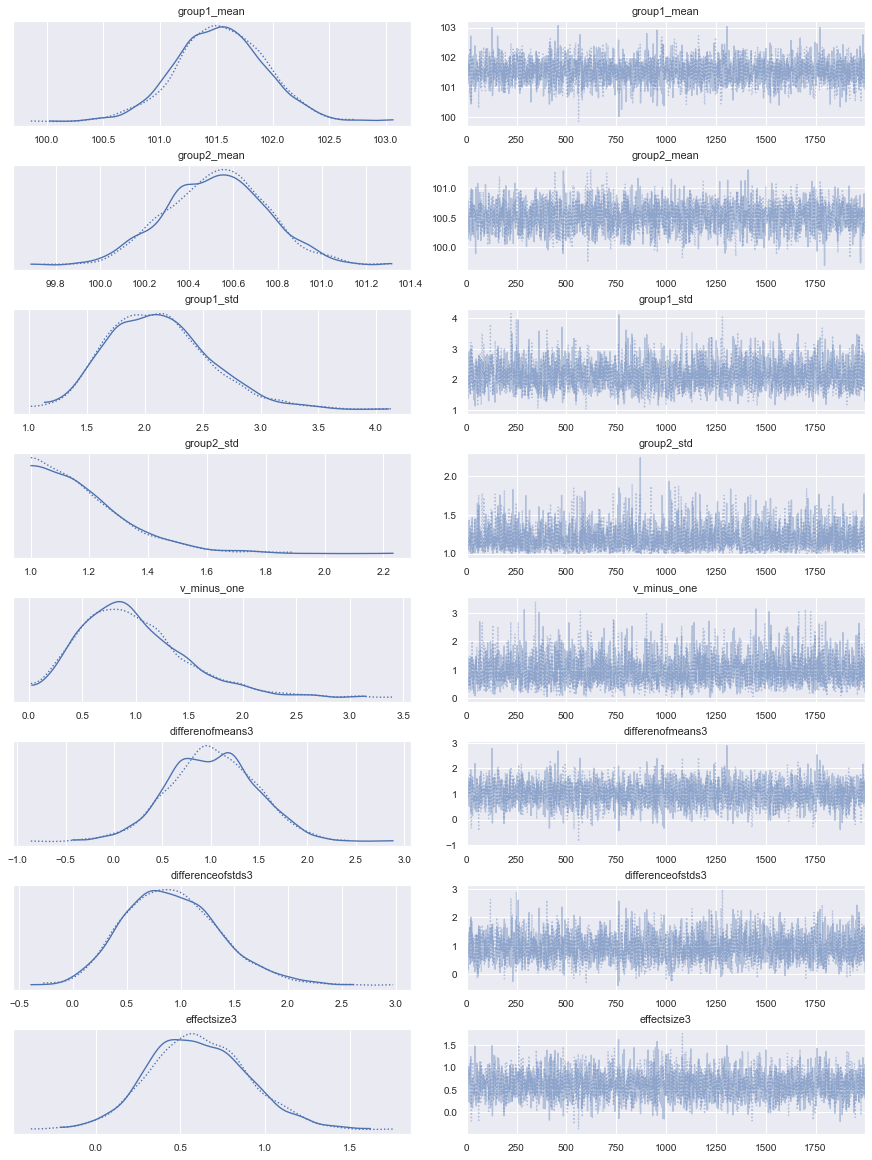

In [28]:
az.plot_trace(diftrace) 

C:\ProgramData\Anaconda3\envs\stat-rethink2-pymc3\lib\site-packages\arviz\data\io_pymc3.py:96: FutureWarning: Using `from_pymc3` without the model will be deprecated in a future release. Not using the model will return less accurate and less useful results. Make sure you use the model argument or call from_pymc3 within a model context.
  warnings.warn(


AttributeError: 'Line2D' object has no property 'varnames'

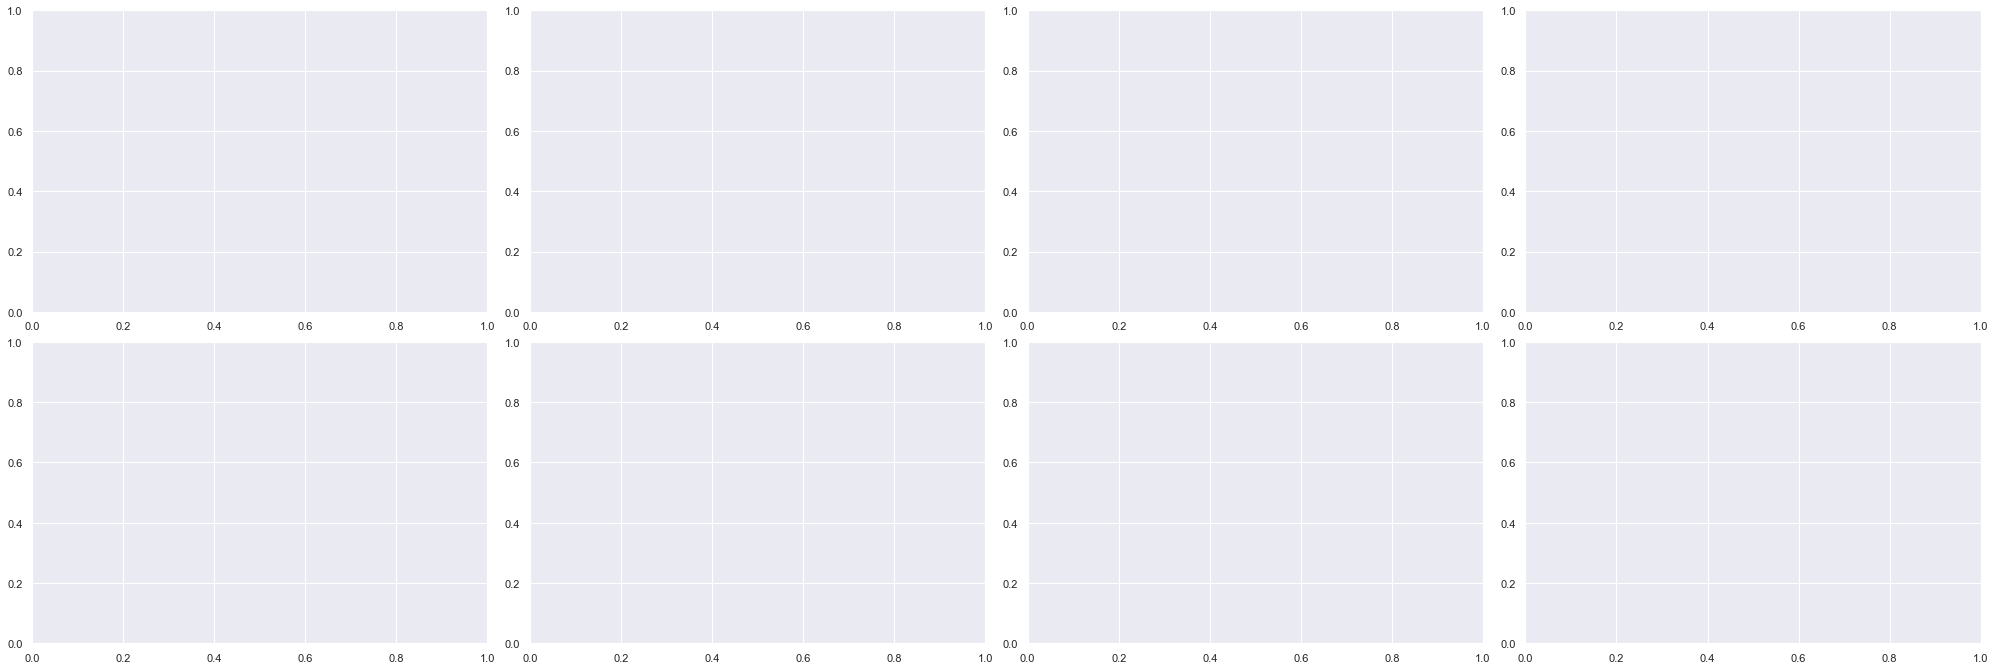

In [29]:
pm.plot_posterior(diftrace,
                  varnames=['differenofmeans3', 'differenceofstds3', 'effectsize3'],
                  ref_val=0,
                  color='#87ceeb')

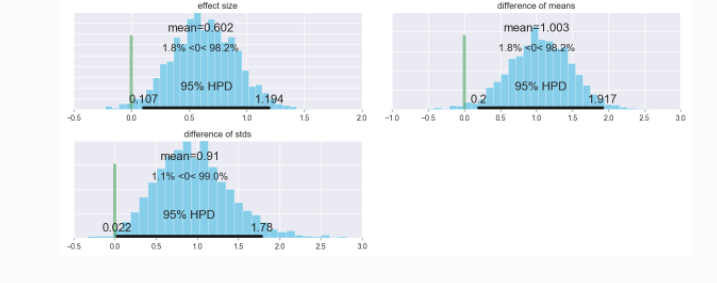

<b>Linear Regression</b>


What we’ve done above is a Gaussian model of height in a population of adults. But it
doesn’t really have the usual feel of “regression” to it. Typically, we are interested in modeling
how an outcome is related to some other variable, a predictor variable. If the predictor
variable has any statistical association with the outcome variable, then we can use it to predict
the outcome. When the predictor variable is built inside the model in a particular way, we’ll
have linear regression.
So now let’s look at how height in these Kalahari foragers (the outcome variable) covaries
with weight (the predictor variable).

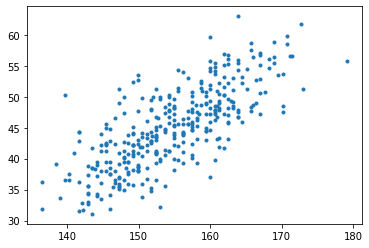

In [4]:
plt.plot(d2.height, d2.weight, ".");

hi ∼ Normal(μi, σ) [likelihood]

μi = α + β(xi − ¯x) [linear model]

α ∼ Normal(178, 20) [α prior]

β ∼ Normal(0, 10) [β prior]

σ ∼ Uniform(0, 50) [σ prior]

In [5]:
xbar=d2.weight.mean()
names = d2.index.values
N = len(names)


In [8]:
import arviz as az


dims={
    "height": ["developer"],
    "weight": ["developer"],
    "age": ["developer"],
}
with pm.Model() as m4_3:
    a = pm.Normal("a", mu=178, sd=20)
    b = pm.Normal("b", mu=0, sd=10)
    sigma = pm.Uniform("sigma", 0, 50)
    mu = a + b * (d2.weight - xbar)
    height = pm.Normal("height", mu=mu, sd=sigma, observed=d2.height)
    #trace_4_3 = pm.sample(1000, tune=1000)
    trace_4_3 = pm.sample(1000, tune=1000 ,chains=4)# CREATES SAMPLES FROM POSTERIOR DISTRIBUTION
    posterior_predictive = pm.sample_posterior_predictive(trace_4_3)# CREATES POSTERIOR PREDICTIVE
                                                                  #CHECKS
    prior = pm.sample_prior_predictive(150) # BUİLDS PRIOR PREDICTİVE DIST
   
    idata_pymc3 = az.from_pymc3(    # FOR ARVIZ USAGE
        trace_4_3,
        prior=prior,
        posterior_predictive=posterior_predictive,
        coords={"developer": names},
        dims=dims
    )

C:\Users\gsahinpi\AppData\Local\Temp/ipykernel_21800/931017760.py:16: FutureWarning: In v4.0, pm.sample will return an `arviz.InferenceData` object instead of a `MultiTrace` by default. You can pass return_inferencedata=True or return_inferencedata=False to be safe and silence this warning.
  trace_4_3 = pm.sample(1000, tune=1000 ,chains=4)# CREATES SAMPLES FROM POSTERIOR DISTRIBUTION
Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (4 chains in 4 jobs)
NUTS: [sigma, b, a]


Sampling 4 chains for 1_000 tune and 1_000 draw iterations (4_000 + 4_000 draws total) took 30 seconds.


0, dim: developer, 352 =? 352


<b>Prior Check</b>


In [9]:
(d2.weight - xbar).min()

-13.91943351988634

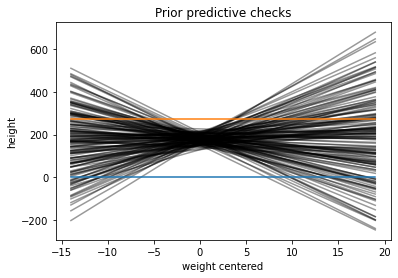

In [10]:
_, ax = plt.subplots()

x = np.linspace(-14, 19, 50)

for a, b in zip(prior["a"], prior["b"]):
    y = a + b * x
    ax.plot(x, y, c="k", alpha=0.4)
ax.plot(x,np.zeros(50))
ax.plot(x,np.ones(50)*272)# the maximum recorded height
ax.set_xlabel("weight centered")
ax.set_ylabel("height")
ax.set_title("Prior predictive checks");

We can do better immediately. We know that average height increases with average
weight, at least up to a point. Let’s try restricting it to positive values. The easiest way to do
this is to define the prior as Log-Normal instead.

In [11]:
import arviz as az
dims={
    "height": ["developer"],
    "weight": ["developer"],
    "age": ["developer"],
}
with pm.Model() as logm4_3:
    a = pm.Normal("a", mu=178, sd=20)
    b = pm.Lognormal("b", mu=0, sd=1)
    sigma = pm.Uniform("sigma", 0, 50)
    #mu = a + b * (d2.weight - xbar)
    mu = pm.Deterministic("mu", a + b * (d2.weight - d2.weight.mean()))
    height = pm.Normal("height", mu=mu, sd=sigma, observed=d2.height)
    #trace_4_3 = pm.sample(1000, tune=1000)
    tracelog_4_3 = pm.sample(1000, tune=1000 ,chains=4)# CREATES SAMPLES FROM POSTERIOR DISTRIBUTION
    posterior_predictive = pm.sample_posterior_predictive( tracelog_4_3)# CREATES POSTERIOR PREDICTIVE
                                                                  #CHECKS
    prior = pm.sample_prior_predictive(150) # BUİLDS PRIOR PREDICTİVE DIST
   
    idata_pymc3 = az.from_pymc3(    # FOR ARVIZ USAGE
        tracelog_4_3,
        prior=prior,
        posterior_predictive=posterior_predictive,
        coords={"developer": names},
        dims=dims
    )

C:\Users\gsahinpi\AppData\Local\Temp/ipykernel_21800/2348679270.py:15: FutureWarning: In v4.0, pm.sample will return an `arviz.InferenceData` object instead of a `MultiTrace` by default. You can pass return_inferencedata=True or return_inferencedata=False to be safe and silence this warning.
  tracelog_4_3 = pm.sample(1000, tune=1000 ,chains=4)# CREATES SAMPLES FROM POSTERIOR DISTRIBUTION
Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (4 chains in 4 jobs)
NUTS: [sigma, b, a]


Sampling 4 chains for 1_000 tune and 1_000 draw iterations (4_000 + 4_000 draws total) took 45 seconds.


0, dim: developer, 352 =? 352


In [12]:
 tracelog_4_3

<MultiTrace: 4 chains, 1000 iterations, 6 variables>

C:\ProgramData\Anaconda3\envs\stat-rethink2-pymc3\lib\site-packages\arviz\data\io_pymc3.py:96: FutureWarning: Using `from_pymc3` without the model will be deprecated in a future release. Not using the model will return less accurate and less useful results. Make sure you use the model argument or call from_pymc3 within a model context.
  warnings.warn(


array([[<AxesSubplot:title={'center':'a'}>,
        <AxesSubplot:title={'center':'a'}>],
       [<AxesSubplot:title={'center':'b'}>,
        <AxesSubplot:title={'center':'b'}>]], dtype=object)

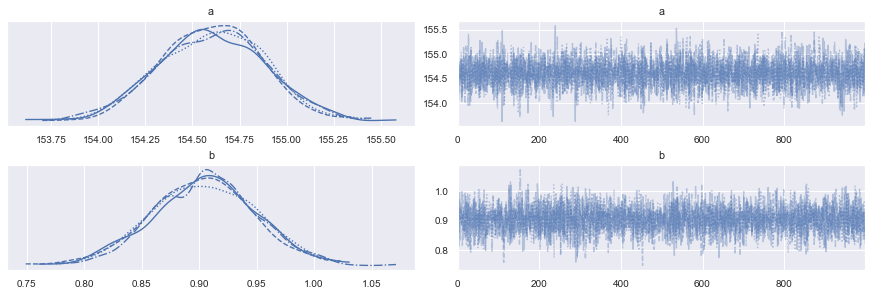

In [29]:
az.plot_trace(tracelog_4_3, var_names=['a', 'b'])

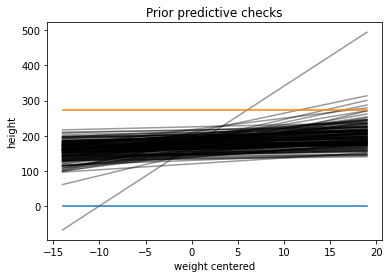

In [13]:
_, ax = plt.subplots()

x = np.linspace(-14, 19, 50)

for a, b in zip(prior["a"], prior["b"]):
    y = a + b * x
    ax.plot(x, y, c="k", alpha=0.4)
ax.plot(x,np.zeros(50))
ax.plot(x,np.ones(50)*272)
ax.set_xlabel("weight centered")
ax.set_ylabel("height")
ax.set_title("Prior predictive checks");

In [14]:
az.summary(tracelog_4_3, kind="stats")

c:\ProgramData\Anaconda3\envs\stat-rethink2-pymc3\lib\site-packages\arviz\data\io_pymc3.py:96: FutureWarning: Using `from_pymc3` without the model will be deprecated in a future release. Not using the model will return less accurate and less useful results. Make sure you use the model argument or call from_pymc3 within a model context.
  warnings.warn(


,mean,sd,hdi_3%,hdi_97%
a,154.599,0.279,154.091,155.108
b,0.904,0.043,0.823,0.985
sigma,5.101,0.197,4.739,5.470
mu[0],157.163,0.303,156.619,157.746
mu[1],146.909,0.463,146.030,147.739
...,...,...,...,...
mu[347],156.445,0.291,155.913,156.989
mu[348],144.884,0.543,143.846,145.865
mu[349],161.085,0.413,160.349,161.875
mu[350],162.802,0.477,161.919,163.677


In [15]:
tracelog_4_3["mu"].shape

(4000, 352)

In [16]:
trace_4_3_df = pm.trace_to_dataframe(tracelog_4_3)
trace_4_3_df.cov().round(3)

,a,b,sigma,mu__0,mu__1,mu__2,mu__3,mu__4,mu__5,mu__6,...,mu__342,mu__343,mu__344,mu__345,mu__346,mu__347,mu__348,mu__349,mu__350,mu__351
a,0.078,-0.000,0.002,0.077,0.079,0.080,0.076,0.078,0.075,0.079,...,0.078,0.077,0.079,0.078,0.078,0.077,0.079,0.077,0.076,0.076
b,-0.000,0.002,-0.000,0.005,-0.016,-0.025,0.015,-0.007,0.033,-0.013,...,-0.002,0.005,-0.011,-0.007,-0.008,0.004,-0.020,0.013,0.017,0.014
sigma,0.002,-0.000,0.039,0.001,0.002,0.003,0.001,0.002,0.000,0.002,...,0.002,0.001,0.002,0.002,0.002,0.002,0.003,0.001,0.001,0.001
mu__0,0.077,0.005,0.001,0.092,0.034,0.010,0.118,0.058,0.169,0.043,...,0.072,0.092,0.049,0.057,0.056,0.088,0.023,0.114,0.123,0.116
mu__1,0.079,-0.016,0.002,0.034,0.215,0.288,-0.049,0.138,-0.208,0.187,...,0.094,0.033,0.168,0.142,0.146,0.047,0.250,-0.035,-0.066,-0.041
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
mu__347,0.077,0.004,0.002,0.088,0.047,0.030,0.107,0.064,0.143,0.053,...,0.074,0.088,0.057,0.063,0.062,0.085,0.038,0.103,0.110,0.105
mu__348,0.079,-0.020,0.003,0.023,0.250,0.343,-0.082,0.154,-0.282,0.215,...,0.099,0.021,0.192,0.159,0.163,0.038,0.295,-0.065,-0.103,-0.072
mu__349,0.077,0.013,0.001,0.114,-0.035,-0.096,0.182,0.028,0.313,-0.012,...,0.064,0.115,0.003,0.025,0.022,0.103,-0.065,0.171,0.196,0.176
mu__350,0.076,0.017,0.001,0.123,-0.066,-0.142,0.210,0.014,0.376,-0.036,...,0.060,0.124,-0.017,0.011,0.007,0.110,-0.103,0.196,0.227,0.202



In choosing priors, there are simple guidelines to get you started. Priors encode states of information
before seeing data. So priors allow us to explore the consequences of beginning with different
information. In cases in which we have good prior information that discounts the plausibility of some
parameter values, like negative associations between height and weight, we can encode that information
directly into priors. When we don’t have such information, we still usually know enough about
the plausible range of values. And you can vary the priors and repeat the analysis in order to study
how different states of initial information influence inference. Frequently, there are many reasonable
choices for a prior, and all of them produce the same inference.



https://github.com/stan-dev/stan/wiki/Prior-Choice-Recommendations

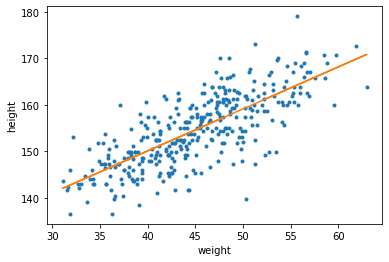

In [18]:
plt.plot(d2.weight, d2.height, ".")
plt.plot(d2.weight, tracelog_4_3["a"].mean() + tracelog_4_3["b"].mean() * (d2.weight - xbar))
plt.xlabel(d2.columns[1])
plt.ylabel(d2.columns[0]);

c:\ProgramData\Anaconda3\envs\stat-rethink2-pymc3\lib\site-packages\arviz\stats\stats.py:456: FutureWarning: hdi currently interprets 2d data as (draw, shape) but this will change in a future release to (chain, draw) for coherence with other functions
  warnings.warn(


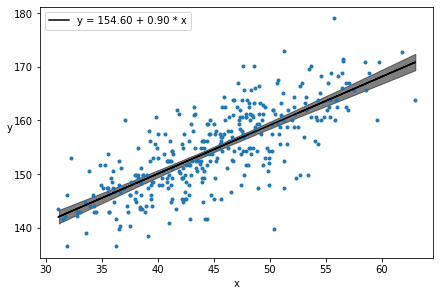

In [19]:
x=d2.weight
y=d2.height
alpha_m=tracelog_4_3["a"].mean()
beta_m=tracelog_4_3["b"].mean()

az.plot_hdi(x, tracelog_4_3['mu'],  color='k')

plt.plot(x, y, 'C0.')
plt.plot(x, alpha_m + beta_m * (x-xbar), c='k',label=f'y = {alpha_m:.2f} + {beta_m:.2f} * x')

plt.xlabel('x')
plt.ylabel('y', rotation=0)
plt.legend()


Notice that uncertainty is lower in the middle, although it is not reduced to a single point,
that is, the posterior is compatible with lines not passing exactly through the mean of the
data. This is the uncertainity in <b>mu</b>:Conditional on the assumption that
height and weight are related by a straight line, then this is the most plausible line, and these are its
plausible bounds.


<b>Prediction intervals.</b>


Now let’s walk through generating an 89% prediction interval
for actual heights, not just the average height, μ. This means we’ll incorporate the
standard deviation σ and its uncertainty as well. Remember, the first line of the statistical
model here is:

hi ∼ Normal(μi, σ)

What you’ve done so far is just use samples from the posterior to visualize the uncertainty
in μi, the linear model of the mean. But actual predictions of heights depend also upon the
distribution in the first line. The Gaussian distribution on the first line tells us that the model
expects observed heights to be distributed around μ, not right on top of it. And the spread
around μ is governed by σ. All of this suggests we need to incorporate σ in the predictions
somehow.

Here’s how you do it. Imagine simulating heights. For any unique weight value, you sample
from a Gaussian distribution with the correct mean μ for that weight, using the correct
value of σ sampled from the same posterior distribution. If you do this for every sample
from the posterior, for every weight value of interest, you end up with a collection of simulated
heights that embody the uncertainty in the posterior as well as the uncertainty in the
Gaussian distribution

c:\ProgramData\Anaconda3\envs\stat-rethink2-pymc3\lib\site-packages\arviz\stats\stats.py:456: FutureWarning: hdi currently interprets 2d data as (draw, shape) but this will change in a future release to (chain, draw) for coherence with other functions
  warnings.warn(
c:\ProgramData\Anaconda3\envs\stat-rethink2-pymc3\lib\site-packages\arviz\stats\stats.py:456: FutureWarning: hdi currently interprets 2d data as (draw, shape) but this will change in a future release to (chain, draw) for coherence with other functions
  warnings.warn(


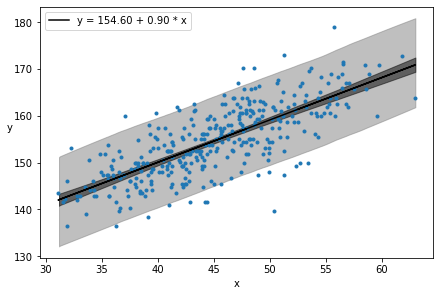

In [20]:
ax=az.plot_hdi(x, posterior_predictive['height'], color='gray')
az.plot_hdi(x, tracelog_4_3['mu'],  color='k',ax=ax)

plt.plot(x, y, 'C0.')
plt.plot(x, alpha_m + beta_m * (x-xbar), c='k',label=f'y = {alpha_m:.2f} + {beta_m:.2f} * x')

plt.xlabel('x')
plt.ylabel('y', rotation=0)
plt.legend();